In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from brian2 import *
from brian2tools import *
import numpy as np
import pandas as pd


# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        'font.size': 22,
        'ytick.color' : 'black',
        "xtick.color" : 'black',
        'axes.labelcolor' : 'black',
        'axes.edgecolor' : 'black'
	}
)

In [ ]:
n_points = 100
n_samples = 2
vec_alpha = np.random.uniform(0, 1, n_points*n_samples)

EL = -60*mV
EE = 0*mV
EI = -80*mV
tauA = 5*ms
tauN = 100*ms
tauI = 10*ms
tauL = 20*ms
rate = 5

eqs = '''
dv/dt = ((EL - v) + ((1 - alpha)*gA + alpha*gN)*(EE - v) + gI*(EI - v))/tauL : volt
dgA/dt = -gA/tauA : 1
dgN/dt = -gN/tauN : 1
dgI/dt = -gI/tauI : 1
alpha : 1
'''

wI_list = [0.1, 1, 10]
wE = 0.5
mean_V = {'alpha':vec_alpha, 0.1:np.zeros(n_points*n_samples), 1:np.zeros(n_points*n_samples), 10:np.zeros(n_points*n_samples)}
var_V = {'alpha':vec_alpha, 0.1:np.zeros(n_points*n_samples), 1:np.zeros(n_points*n_samples), 10:np.zeros(n_points*n_samples)}

for wI in wI_list:
	print(wI, end='\t')
	for i, alpha_value in enumerate(vec_alpha):
		print(i/size(vec_alpha), end=' ')
		
		start_scope()
		defaultclock.dt = 0.01*ms
		
		G = NeuronGroup(1, eqs, method='rk4')
		GPA = PoissonGroup(400, rates=rate*Hz)
		GPN = PoissonGroup(400, rates=rate*Hz)
		GPI = PoissonGroup(100, rates=rate*Hz)

		SA = Synapses(GPA, G, 'w : 1', on_pre='gA += w')
		SN = Synapses(GPN, G, 'w : 1', on_pre='gN += w')
		SI = Synapses(GPI, G, 'w : 1', on_pre='gI += w')
		SA.connect()
		SN.connect()
		SI.connect()

		G.v = EL
		SA.w = wE
		SN.w = wE
		SI.w = wI

		G.alpha = alpha_value
		
		run(5000*ms)

		M = StateMonitor(G, 'v', record=True)

		run(20000*ms)

		mean_V[wI][i] = np.mean(M.v[0]/mV)
		var_V[wI][i] = np.var(M.v[0]/mV)
		

In [ ]:
# Convert to pandas DataFrame
df_mean_V = pd.DataFrame.from_dict(mean_V)
df_var_V = pd.DataFrame.from_dict(var_V)

# Save Dataframe do csv file
df_mean_V.to_csv('mean_V_wI_interpolated.dat')
df_var_V.to_csv('var_V_wI_interpolated.dat')

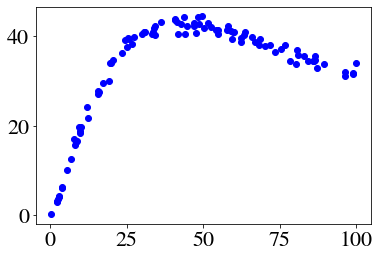

In [6]:
# plt.ylim(0, 50)
plt.plot(vec_tauA, var_V_ta[10], 'bo')
# var_V_ta